# Average EHR Spending by City

In [186]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
import seaborn as sns

In [213]:
## Load the datasets
df_ehr_provider = pd.read_csv('EHR_Incentive_Program_Payments_Providers.csv')
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_city_revenue = pd.read_csv('City_Revenues_Per_Capita.csv')
df_city_expenditure = pd.read_csv('City_Expenditures_Per_Capita.csv')

## Analysis for EHR per Capita for Individual Healthcare Providers

In [214]:
## delete the unneeded columns on the provider dataset
df_ehr_provider.drop(df_ehr_provider.columns[0:8],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[1:4],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[3:6],axis=1,inplace = True)
df_ehr_provider.drop(['Program_Ye','Payee_NPI','Latitude','Longitude','total_rece'],axis=1,inplace = True)
df_ehr_provider.head()


,Business_C,Payment_Ye,total_paym
0,Sacramento,2019,38250.0
1,Oakland,2014,21250.0
2,Antioch,2016,21250.0
3,Loma Linda,2015,29750.0
4,Orange,2014,21250.0


In [215]:
## group the practitioner data by city and year, then sum the total payments
df_ehr_provider['Business_C'] = df_ehr_provider['Business_C'].str.lower()
df_ehr_provider = df_ehr_provider.groupby(['Business_C','Payment_Ye'])['total_paym'].sum().reset_index()
df_ehr_provider.to_csv('test_group_by_check.csv')
df_ehr_provider.head()

,Business_C,Payment_Ye,total_paym
0,adelanto,2014,14166.67
1,adelanto,2015,21250.00
2,adelanto,2016,29750.00
3,agoura hills,2014,63750.00
4,agoura hills,2016,21250.00


In [216]:
#change all Entity Names to lower case
df_city_revenue['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_revenue.head()

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2021,22556106,36569.0,617.0
1,adelanto,2020,20455012,35663.0,574.0
2,adelanto,2019,20232000,35136.0,576.0
3,adelanto,2018,18224861,35293.0,516.0
4,adelanto,2017,15171753,34273.0,443.0


In [217]:
df_city_expenditure['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_expenditure.head()

,Entity Name,Fiscal Year,Total Expenditures,Estimated Population,Expenditures Per Capita
0,adelanto,2021,20580944,36569.0,563.0
1,adelanto,2020,26376314,35663.0,740.0
2,adelanto,2019,30886709,35136.0,879.0
3,adelanto,2018,20531571,35293.0,582.0
4,adelanto,2017,16035685,34273.0,468.0


In [218]:
## merge the provider dataset with the city revenue dataset
df_provider_city = df_ehr_provider.merge(df_city_revenue, how="inner",left_on=['Business_C','Payment_Ye'],right_on=['Entity Name','Fiscal Year'])
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,adelanto,2014,13047272,32511.0,401.0
1,adelanto,2015,21250.00,adelanto,2015,14051611,33084.0,425.0
2,adelanto,2016,29750.00,adelanto,2016,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,agoura hills,2014,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,agoura hills,2016,28100766,21211.0,1325.0


In [219]:
## drop the duplicate columns
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0


In [220]:
## merge with the city expenditure dataset
df_provider_city = df_provider_city.merge(df_city_expenditure, how="inner",left_on=['Business_C','Payment_Ye', 'Estimated Population'],right_on=['Entity Name','Fiscal Year', 'Estimated Population'])
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [221]:
df_provider_city.to_csv('ultimate_test.csv')

In [222]:
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [223]:
## create the "EHR per Capita" column by divide the total_paym by the estimated population in that year
df_provider_city['EHR Per Capita'] = df_provider_city['total_paym']/df_provider_city['Estimated Population']
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0,0.435750
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0,0.642304
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0,0.888139
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0,3.090909
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0,1.001839


In [224]:
## Get the last entry for each city as the total payment they have received
df_provider_city_last = df_provider_city.groupby(['Business_C']).apply(lambda x: x.iloc[[-1]]).reset_index(drop=True)
df_provider_city_last.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,adelanto,2016,29750.0,14565863,33497.0,435.0,23692799,707.0,0.888139
1,agoura hills,2016,21250.0,28100766,21211.0,1325.0,31218079,1472.0,1.001839
2,alameda,2020,191250.0,296672492,81312.0,3649.0,260518041,3204.0,2.352051
3,albany,2015,29750.0,28109961,18565.0,1514.0,24990215,1346.0,1.602478
4,alhambra,2020,46750.0,133617079,86792.0,1540.0,137772968,1587.0,0.538644


In [225]:
df_provider_city_last.shape

(404, 9)

404 observations of 9 variables

In [226]:
df_provider_city_last.to_csv('df_provider_city_last.csv')

### Plot the preliminary histograms

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([  350.    ,   354.3096,   358.6192, ..., 21889.3808, 21893.6904,
        21898.    ]),
 <BarContainer object of 5000 artists>)

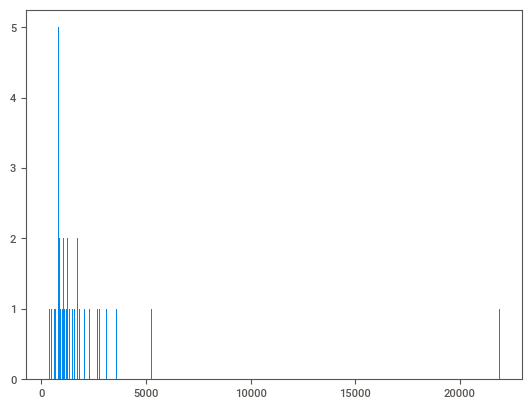

In [227]:
## plot the histogram for revenue per capita
plt.hist(df_provider_city_last['Revenues Per Capita'], bins=5000)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([  361.    ,   366.4784,   371.9568, ..., 27742.0432, 27747.5216,
        27753.    ]),
 <BarContainer object of 5000 artists>)

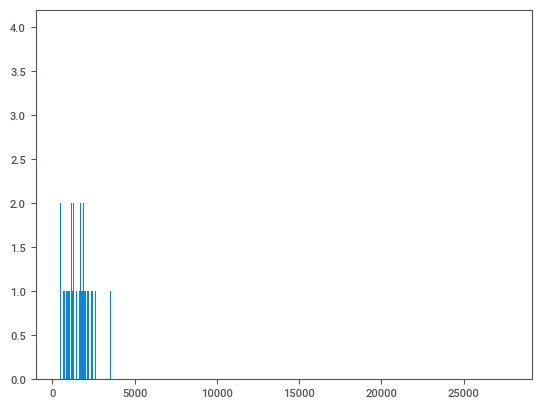

In [228]:
## plot the histogram for expenditure per capita
plt.hist(df_provider_city_last['Expenditures Per Capita'], bins=5000)

(array([2., 4., 2., ..., 0., 0., 1.]),
 array([1.41826458e-01, 1.82724018e-01, 2.23621579e-01, ...,
        2.04547835e+02, 2.04588732e+02, 2.04629630e+02]),
 <BarContainer object of 5000 artists>)

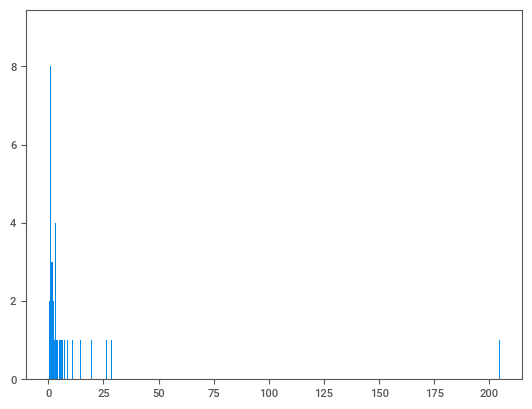

In [229]:
## plot the histogram for EHR per Capita
plt.hist(df_provider_city_last['EHR Per Capita'], bins=5000)

<AxesSubplot: xlabel='EHR Per Capita', ylabel='Density'>

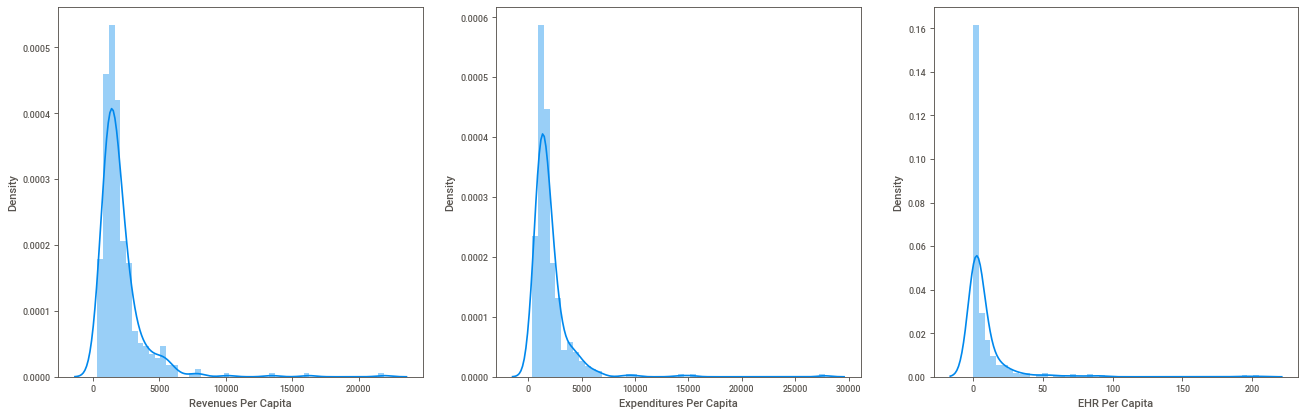

In [230]:
# Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

plt.subplot(1,3,1)
sns.distplot(df_provider_city_last['Revenues Per Capita'])  # right skewed distribution -> log transformation
plt.subplot(1,3,2)
sns.distplot(df_provider_city_last['Expenditures Per Capita'])  # right skewed distribution -> log transformation
plt.subplot(1,3,3)
sns.distplot(df_provider_city_last['EHR Per Capita']) # right skewed distribution -> log transformation


In [231]:
## Standard OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df_provider_city_last['EHR Per Capita']
x = df_provider_city_last['Revenues Per Capita']
z = df_provider_city_last['Expenditures Per Capita']

model = ols('y ~ x + z', data = df_provider_city_last).fit()
table = sm.stats.anova_lm(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.776
Date:                Sat, 19 Nov 2022   Prob (F-statistic):             0.0237
Time:                        20:52:28   Log-Likelihood:                -1745.0
No. Observations:                 404   AIC:                             3496.
Df Residuals:                     401   BIC:                             3508.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9251      1.406      3.502      0.0

In [232]:
# displays the summary of the normalized data. 
import sweetviz as sv

my_report = sv.analyze(df_provider_city_last)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Outlier treatment: 
1. log transformation for positively skewed variables
2. remove outliers using Quantile-based Flooring and Capping
Quantile-based Flooring and Capping In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.

In [233]:
import math

print(f"Before treatment: {df_provider_city_last['Expenditures Per Capita'].skew()}")
df_provider_city_last['Expenditures Per Capita'] = df_provider_city_last['Expenditures Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_provider_city_last['Expenditures Per Capita'].skew()}")

Before treatment: 6.9743777070966395
After treatment: 0.7173423061761003


In [234]:
print(f"Before treatment: {df_provider_city_last['Revenues Per Capita'].skew()}")
df_provider_city_last['Revenues Per Capita'] = df_provider_city_last['Revenues Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_provider_city_last['Revenues Per Capita'].skew()}")

Before treatment: 5.231422721097847
After treatment: 0.5333292845359128


In [235]:
print(f"Before treatment: {df_provider_city_last['EHR Per Capita'].skew()}")
df_provider_city_last['EHR Per Capita'] = df_provider_city_last['EHR Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_provider_city_last['EHR Per Capita'].skew()}")

Before treatment: 6.769951036858467
After treatment: 0.4062687614207408


<AxesSubplot: xlabel='EHR Per Capita', ylabel='Density'>

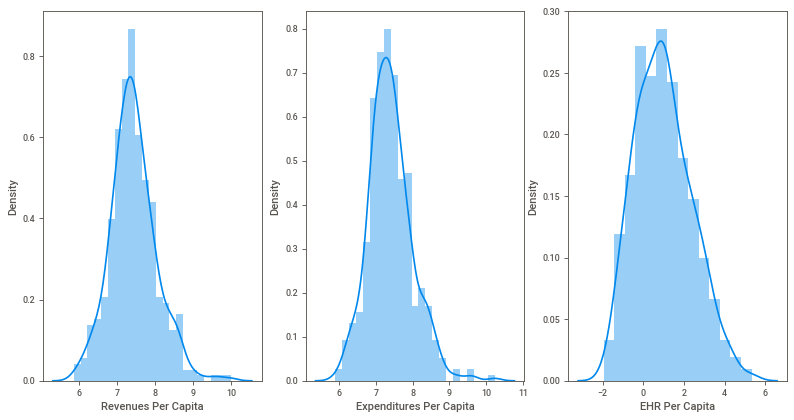

In [236]:
# Plot the Distribution plots for the features
warnings.filterwarnings('ignore')
figure(figsize=(12, 6), dpi=80)
plt.subplot(1,3,1)
sns.distplot(df_provider_city_last['Revenues Per Capita'])
plt.subplot(1,3,2)
sns.distplot(df_provider_city_last['Expenditures Per Capita'])
plt.subplot(1,3,3)
sns.distplot(df_provider_city_last['EHR Per Capita']) # right skewed distribution -> log transformation

In [237]:

y = df_provider_city_last['EHR Per Capita']
x = df_provider_city_last['Revenues Per Capita']
z = df_provider_city_last['Expenditures Per Capita']

model = ols('y ~ x + z', data = df_provider_city_last).fit()
table = sm.stats.anova_lm(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.778
Date:                Sat, 19 Nov 2022   Prob (F-statistic):             0.0237
Time:                        20:52:31   Log-Likelihood:                -700.31
No. Observations:                 404   AIC:                             1407.
Df Residuals:                     401   BIC:                             1419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0778      0.853     -1.263      0.2

In [238]:
# displays the summary of the normalized data. 
my_report = sv.analyze(df_provider_city_last)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


BOX PLOT VALUES : 
First Quartile : 7.07
Second Quartile : 7.76
IQR Range : 0.69
Lower Range : 6.03
Upper Range : 8.8


[Text(0.5, 1.0, 'Revenues Per Capita')]

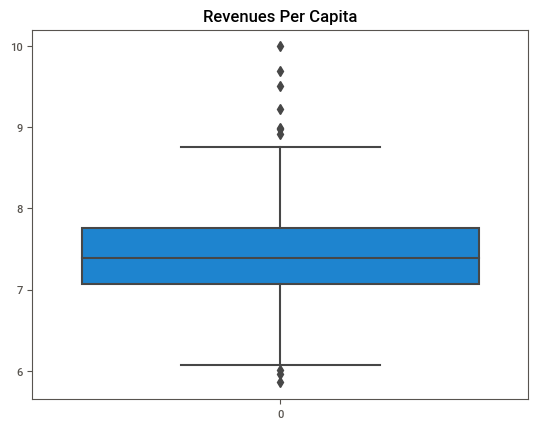

In [239]:
#determine the upper boundary and lower boundary by plotting box plot
# remove outliers from Seaborn boxplots.
# Outlier shown with a dot

df = df_provider_city_last.copy()

import seaborn as sns 

def boxplot(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = (Q3 - Q1)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(df['Revenues Per Capita'])
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

sns.boxplot(df['Revenues Per Capita']).set(title='Revenues Per Capita')

In [240]:
# Upper and Lower Range of the dataset of Revenues Per Capita

upper_outlier = len(df[df['Revenues Per Capita'] > upper_range])
lower_outlier = len(df[df['Revenues Per Capita'] < lower_range])
total = len(df[(df_provider_city_last['Revenues Per Capita']  < lower_range) | (df['Revenues Per Capita']  > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in the dataset :", total)

# remove outliers
df = df[(df['Revenues Per Capita']  > lower_range) & (df['Revenues Per Capita']  < upper_range)]


Total Range is as folows
Lower Range : 6.03
Upper Range : 8.8
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 7
Total Outlier BELOW LOWER RANGE : 3
Total Outlier in the dataset : 10


BOX PLOT VALUES : 
First Quartile : 7.01
Second Quartile : 7.67
IQR Range : 0.67
Lower Range : 6.01
Upper Range : 8.67


[Text(0.5, 1.0, 'Expenditures Per Capita')]

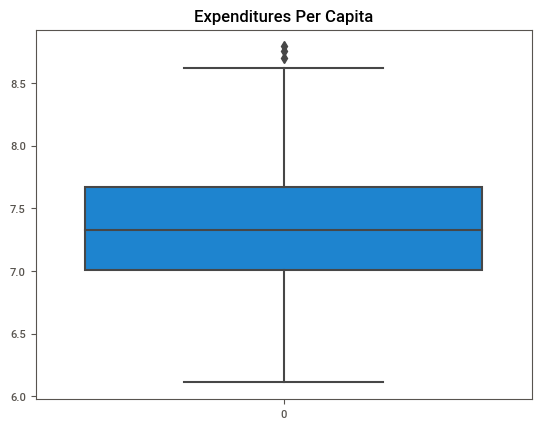

In [241]:
# Upper and Lower Range of the dataset of Expenditures Per Capita

Q1,Q3,IQR,lower_range,upper_range = boxplot(df['Expenditures Per Capita'])
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

sns.boxplot(df['Expenditures Per Capita']).set(title='Expenditures Per Capita')

In [242]:
upper_outlier = len(df[df['Expenditures Per Capita'] > upper_range])
lower_outlier = len(df[df['Expenditures Per Capita'] < lower_range])
total = len(df[(df['Expenditures Per Capita']  < lower_range) | (df['Expenditures Per Capita']  > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in the dataset :", total)

# remove outliers
df = df[(df['Expenditures Per Capita']  > lower_range) & (df['Expenditures Per Capita']  < upper_range)]


Total Range is as folows
Lower Range : 6.01
Upper Range : 8.67
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 3
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in the dataset : 3


In [243]:
df.shape

(391, 9)

# Regression Analysis

In [244]:
## Standard OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df_provider_city_last['EHR Per Capita']
x = df_provider_city_last['Revenues Per Capita']
z = df_provider_city_last['Expenditures Per Capita']

model = ols('y ~ x + z', data = df_provider_city_last).fit()
table = sm.stats.anova_lm(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.778
Date:                Sat, 19 Nov 2022   Prob (F-statistic):             0.0237
Time:                        20:52:33   Log-Likelihood:                -700.31
No. Observations:                 404   AIC:                             1407.
Df Residuals:                     401   BIC:                             1419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0778      0.853     -1.263      0.2

EHR Per Capita = 0.6798*(Revenues Per Capita) - 0.4673*(Expenditures Per Capita) - 0.6035 

In [245]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# ================================================
# Build the model
# ================================================

# Training data
X = df_provider_city_last[['Revenues Per Capita', 'Expenditures Per Capita']] # feature 
y = df_provider_city_last['EHR Per Capita'] # target


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

print(X_train.shape); print(X_test.shape)


(282, 2)
(122, 2)


training set: 282 observations of 2 variables

test set: 122 observations of 2 variables

In [246]:
# Train the model: include an intercept to the model by default
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [247]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head()

,Actual,Predicted
121,-0.414615,1.043864
355,1.077222,0.684900
225,-0.287317,1.242160
398,0.844227,1.158736
129,-0.717011,0.885140


In [248]:
import hvplot.pandas
pd.DataFrame({'True Values(y test)': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values(y test)', y='Predicted Values')

:Scatter   [True Values(y test)]   (Predicted Values)

### Check the distribution of the error terms

In [249]:
pd.DataFrame({'Error Values': (y_test - y_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

Check the distribution of the error terms
In linear regression we assume that the error term follows normal distribution. So we have to check this assumption before we can use the model for making predictions. We check this by looking at the histogram of the error term visually, making sure that the error terms are normally distributed around zero and that the left and right side are broadly similar.

# Comparing machine learning models

https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/

## Stochastic Gradient Descent
Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [250]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [251]:
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
svr = SVR(verbose=True, kernel='rbf', C=1)  
ransacr = RANSACRegressor(min_samples=78, max_trials=1,random_state=42)
sgd = SGDRegressor(n_iter_no_change=250, tol=1e-100, eta0=0.00003, max_iter=100000,random_state=42)
adaboost = AdaBoostRegressor(random_state=100)
linear = LinearRegression()

decision_tree.fit(X_train,y_train)
random_forest.fit(X_train,y_train)
svr.fit(X_train,y_train)
ransacr.fit(X_train,y_train)
sgd.fit(X_train,y_train)
adaboost.fit(X_train,y_train)
linear.fit(X_train,y_train);

#  train dataset 
decision_tree_preds = decision_tree.predict(X_train)
random_forest_preds = random_forest.predict(X_train)
svr_preds = svr.predict(X_train)
ransacr_preds = ransacr.predict(X_train)
sgd_preds = sgd.predict(X_train)
adaboost_preds = adaboost.predict(X_train)
linear_preds = linear.predict(X_train)

results_df = pd.DataFrame([])

for label, preds in [('Decision Tree', decision_tree_preds),
                     ('Random Forest', random_forest_preds),
                     ('Support Vector Regression',svr_preds),
                     ('Random Sample Consensus',ransacr_preds),
                     ('Stochastic Gradient Descent',sgd_preds),
                     ('Adaboost',      adaboost_preds),
                     ('Linear',        linear_preds)]:
    
    r2 = r2_score(y_train, preds)
    mse = mean_squared_error(y_train, preds)
    mae = mean_absolute_error(y_train, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, preds))
    
    results_df_2 = pd.DataFrame(data=[[label, r2, mse, mae, rmse]],
                          columns=['Model', 'R2 Square', 'MSE', 'MAE', 'RMSE'])
    results_df = results_df.append(results_df_2, ignore_index=True)

    print('\n  --- {} on training data ---'.format(label))
    print('           R2 Score: {:.3}'.format(r2))
    print(' Mean Squared Error: {:.3}'.format(mse))
    print('Mean Absolute Error: {:.3}'.format(mae))
    print('Root Mean Square Error: {:.3}'.format(rmse))

[LibSVM]*
optimization finished, #iter = 195
obj = -268.666656, rho = -0.475473
nSV = 262, nBSV = 255

  --- Decision Tree on training data ---
           R2 Score: 1.0
 Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Root Mean Square Error: 0.0

  --- Random Forest on training data ---
           R2 Score: 0.823
 Mean Squared Error: 0.324
Mean Absolute Error: 0.459
Root Mean Square Error: 0.569

  --- Support Vector Regression on training data ---
           R2 Score: 0.0405
 Mean Squared Error: 1.75
Mean Absolute Error: 1.04
Root Mean Square Error: 1.32

  --- Random Sample Consensus on training data ---
           R2 Score: -0.0151
 Mean Squared Error: 1.85
Mean Absolute Error: 1.11
Root Mean Square Error: 1.36

  --- Stochastic Gradient Descent on training data ---
           R2 Score: 0.016
 Mean Squared Error: 1.8
Mean Absolute Error: 1.08
Root Mean Square Error: 1.34

  --- Adaboost on training data ---
           R2 Score: 0.119
 Mean Squared Error: 1.61
Mean Absolute Error: 1

In [252]:
#  testing dataset 
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
svr_preds = svr.predict(X_test)
ransacr_preds = ransacr.predict(X_test)
sgd_preds = sgd.predict(X_test)
adaboost_preds = adaboost.predict(X_test)
linear_preds = linear.predict(X_test)

results_df = pd.DataFrame([])

for label, preds in [('Decision Tree', decision_tree_preds),
                     ('Random Forest', random_forest_preds),
                     ('Support Vector Regression',svr_preds),
                     ('Random Sample Consensus',ransacr_preds),
                     ('Stochastic Gradient Descent',sgd_preds),
                     ('Adaboost',      adaboost_preds),
                     ('Linear',        linear_preds)]:
    
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    
    results_df_2 = pd.DataFrame(data=[[label, r2, mse, mae, rmse]],
                          columns=['Model', 'R2 Square', 'MSE', 'MAE', 'RMSE'])
    results_df = results_df.append(results_df_2, ignore_index=True)

    print('\n  --- {} on training data ---'.format(label))
    print('           R2 Score: {:.3}'.format(r2))
    print(' Mean Squared Error: {:.3}'.format(mse))
    print('Mean Absolute Error: {:.3}'.format(mae))
    print('Root Mean Square Error: {:.3}'.format(rmse))


  --- Decision Tree on training data ---
           R2 Score: -1.24
 Mean Squared Error: 4.73
Mean Absolute Error: 1.69
Root Mean Square Error: 2.17

  --- Random Forest on training data ---
           R2 Score: -0.339
 Mean Squared Error: 2.82
Mean Absolute Error: 1.33
Root Mean Square Error: 1.68

  --- Support Vector Regression on training data ---
           R2 Score: -0.00353
 Mean Squared Error: 2.11
Mean Absolute Error: 1.16
Root Mean Square Error: 1.45

  --- Random Sample Consensus on training data ---
           R2 Score: -0.0624
 Mean Squared Error: 2.24
Mean Absolute Error: 1.23
Root Mean Square Error: 1.5

  --- Stochastic Gradient Descent on training data ---
           R2 Score: 0.00681
 Mean Squared Error: 2.09
Mean Absolute Error: 1.17
Root Mean Square Error: 1.45

  --- Adaboost on training data ---
           R2 Score: -0.0843
 Mean Squared Error: 2.28
Mean Absolute Error: 1.22
Root Mean Square Error: 1.51

  --- Linear on training data ---
           R2 Score: -0.0

--- Support Vector Regression on training data ---
           R2 Score: 0.0405
 Mean Squared Error: 1.75
Mean Absolute Error: 1.04
Root Mean Square Error: 1.32


  --- Support Vector Regression on testing data ---
           R2 Score: -0.00353
 Mean Squared Error: 2.11
Mean Absolute Error: 1.16
Root Mean Square Error: 1.45

## Random Sample Consensus(RANSAC) Regression
Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.


 --- Random Sample Consensus on training data ---
           R2 Score: -0.335
 Mean Squared Error: 2.44
Mean Absolute Error: 1.19
Root Mean Square Error: 1.56

 --- Random Sample Consensus on testing data ---
           R2 Score: -0.26
 Mean Squared Error: 2.65
Mean Absolute Error: 1.28
Root Mean Square Error: 1.63

In [253]:
model_SVR = RANSACRegressor(min_samples=199, max_trials=1,random_state=42)

# test data
model_SVR.fit(X_train, y_train) 

# Predict on training data
pred_train_SVR= model_SVR.predict(X_train)

r2 = r2_score(y_train,pred_train_SVR)
mse = mean_squared_error(y_train,pred_train_SVR)
mae = mean_absolute_error(y_train,pred_train_SVR)
rmse = np.sqrt(metrics.mean_squared_error(y_train,pred_train_SVR))

# Print evaluation values on training data
print('\n  --- {} ---'.format("Support Vector Regression on training data"))
print('           R2 Score: {:.3}'.format(r2))
print(' Mean Squared Error: {:.3}'.format(mse))
print('Mean Absolute Error: {:.3}'.format(mae))
print('Root Mean Square Error: {:.3}'.format(rmse))

# Predict on testing data
pred_test_SVR = model_SVR.predict(X_test)

r2 = r2_score(y_test,pred_test_SVR)
mse = mean_squared_error(y_test,pred_test_SVR)
mae = mean_absolute_error(y_test,pred_test_SVR)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_test_SVR))

# Print evaluation values on testing data
print('\n  --- {} ---'.format("Support Vector Regression on testing data"))
print('           R2 Score: {:.3}'.format(r2))
print(' Mean Squared Error: {:.3}'.format(mse))
print('Mean Absolute Error: {:.3}'.format(mae))
print('Root Mean Square Error: {:.3}'.format(rmse))



  --- Support Vector Regression on training data ---
           R2 Score: 0.0233
 Mean Squared Error: 1.78
Mean Absolute Error: 1.07
Root Mean Square Error: 1.34

  --- Support Vector Regression on testing data ---
           R2 Score: -0.00853
 Mean Squared Error: 2.12
Mean Absolute Error: 1.19
Root Mean Square Error: 1.46


# Kruskal-Wallis Test

Assumptions:
The variables should have:
1. One independent variable with two or more levels (independent groups) -> city (independent variable)
2. Ordinal scale, Ratio Scale or Interval scale dependent variables. -> 'EHR Per Capita' is a ratio variable.

We want to find out how city affects actual EHR per capita.

Null Hypothesis: the EHR per capita has the same distributions in each city

In [626]:
# Importing required library
from scipy.stats import kruskal

# Perform Kruskal Wallis Test
group_data = df_provider_city_last.groupby('Business_C')['EHR Per Capita'].apply(list).to_dict()

result = stats.kruskal(*group_data.values())
result

KruskalResult(statistic=390.0, pvalue=0.490476781769723)

In [628]:
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis (Different distribution')
else:
    print('Do not Reject Null Hypothesis (Same distribution)')


Do not Reject Null Hypothesis (Same distribution)


# Spearman's rank correlation coefficient

H0: EHR per capita is not related to the Revenues Per Capita.

H1: EHR per capita is related to the Revenues Per Capita (Higher per-capita revenue city gets more or less per-capita EHR). 

In [707]:
from scipy import stats
result = stats.spearmanr(df_provider_city_last['EHR Per Capita'],df_provider_city_last['Revenues Per Capita'] )
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')


SpearmanrResult(correlation=0.05198335907780493, pvalue=0.3052184680033309)
Do not Reject Null Hypothesis


H0: EHR per capita is not related to the Expenditures Per Capita.
    
H1: EHR per capita is related to the Expenditures Per Capita. 

In [708]:
result = stats.spearmanr(df_provider_city_last['EHR Per Capita'],df_provider_city_last['Expenditures Per Capita'] )
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')

SpearmanrResult(correlation=0.03923627489966774, pvalue=0.4391312403359442)
Do not Reject Null Hypothesis


In [710]:
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(df_provider_city_last['EHR Per Capita'], df_provider_city_last['Expenditures Per Capita'], df_provider_city_last['Revenues Per Capita'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=185.316, p=0.000
Different distributions (reject H0)


# Comparing machine learning models¶

In [697]:
# coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Revenues Per Capita,11.678199
Expenditures Per Capita,-7.991750


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Revenues Per Capita and Expenditures Per Capita is associated with an increase of 11.678199 and a decrease of -7.991750 in EHR per capita respectively.

In [ ]:
# surgery dataset

In [843]:
## Load the datasets
df_ehr_provider = pd.read_csv('EHR_Incentive_Program_Payments_Providers.csv')
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_city_revenue = pd.read_csv('City_Revenues_Per_Capita.csv')
df_city_expenditure = pd.read_csv('City_Expenditures_Per_Capita.csv')

## delete the unneeded columns on the provider dataset
df_ehr_provider.drop(df_ehr_provider.columns[0:8],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[2:5],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[3:7],axis=1,inplace = True)
df_ehr_provider.drop(['Latitude','Longitude','total_rece'],axis=1,inplace = True)
df_ehr_provider.head()


,Business_C,Business_1,Payment_Ye,total_paym
0,Sacramento,Sacramento,2019,38250.0
1,Oakland,Alameda,2014,21250.0
2,Antioch,Contra Costa,2016,21250.0
3,Loma Linda,San Bernardino,2015,29750.0
4,Orange,Orange,2014,21250.0


In [795]:
df_surgery = pd.read_csv('dispositionas.csv')
df_surgery.head()

,patcnty1,serv_y,disp1,Encounters
0,Alameda,2012,Acute Care,139
1,Alameda,2012,Childrens_or_Cancer,3
2,Alameda,2012,Critical Access Hospital,1
3,Alameda,2012,Died,5
4,Alameda,2012,Home Health Service,170


In [794]:
# clean the noisy data
df_ehr_hospital = df_ehr_hospital.drop(df_ehr_hospital.columns[0:7], axis=1)
df_ehr_hospital = df_ehr_hospital.drop(df_ehr_hospital.columns[[2,3,4,5,6,8,9,10,11,12]], axis=1)
#df_EHR = df_EHR.drop(['Payment__1','Payment_Cr','Payee_Name','Payee_NPI','total_rece','Latitude','Longitude','Program_Ye'],axis=1)
df_ehr_hospital = df_ehr_hospital.dropna()
df_ehr_hospital.head()



,Business_City,Business_County,total_payments,Last_Payment_Year
0,Eureka,Humboldt,1530950.70,2016
1,Hayward,Alameda,3245920.28,2016
2,Napa,Napa,1262015.89,2016
3,Jackson,Amador,865130.13,2019
4,San Francisco,San Francisco,984465.12,2019


In [796]:
len(df_ehr_hospital['Business_County'].unique())

53

In [813]:
df_ehr_provider = df_ehr_provider[df_ehr_provider['Business_1']!='UNKNOWN']
df_ehr_provider = df_ehr_provider[df_ehr_provider['Business_1']!='Unknown']
len(df_ehr_provider['Business_1'].unique())

57

In [814]:
len(df_surgery['patcnty1'].unique())

57

In [818]:
df_ehr_provider = df_ehr_provider.groupby('Business_1')['total_paym'].sum().reset_index()
df_ehr_provider.head()

,Business_1,total_paym
0,Alameda,38481077.35
1,Amador,327250.01
2,Butte,5342250.00
3,Calaveras,131750.00
4,Colusa,484500.00


In [819]:
df_surgery = df_surgery.groupby('patcnty1')['Encounters'].sum().reset_index()
df_surgery.head()

,patcnty1,Encounters
0,Alameda,620774
1,Amador,26910
2,Butte,176297
3,Calaveras,39581
4,Colusa,11924


In [820]:
result = stats.spearmanr(df_ehr_provider['total_paym'],df_surgery['Encounters'])
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')

SpearmanrResult(correlation=0.9374513870884107, pvalue=7.105997639622854e-27)
Reject Null Hypothesis


In [829]:

# ================================================
# Build the model
# ================================================

# Training data
X = df_surgery[['Encounters']] # feature 
y = df_ehr_provider['total_paym'] # target

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model: include an intercept to the model by default
model = LinearRegression()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 4162910.3078936944
MSE: 27803994771543.984
RMSE: 5272949.342781892
R2 Square 0.9255851042232545
__________________________________


In [827]:
## Standard OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df_ehr_provider['total_paym']
x = df_surgery['Encounters']
#z = df_provider_city_last['Expenditures Per Capita']

# adding the constant term
x = sm.add_constant(x)
lm = sm.OLS(y, x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             total_paym   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           6.79e-39
Time:                        01:15:29   Log-Likelihood:                -974.73
No. Observations:                  57   AIC:                             1953.
Df Residuals:                      55   BIC:                             1958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.635e+06   9.91e+05     -2.659      0.0

In [831]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree regression", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

ValueError: Found input variables with inconsistent numbers of samples: [18, 118]